## Parallelization 

Jab ek node ki output doosre node ki input nahi ban rhi hoti toh bas hum un dono nodes ko parallely implement kr sakte hai
Aggregator type of node banake sabki output ek node mei le sakte hai

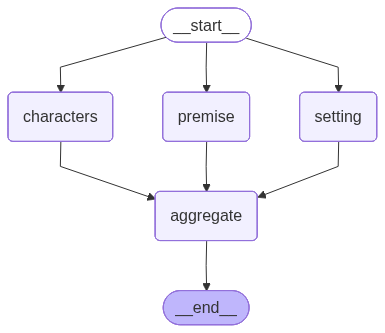

In [6]:
from typing_extensions import TypedDict
from typing import List
from langgraph.graph import StateGraph, START, END
import os
from dotenv import load_dotenv
from langchain_groq import ChatGroq

load_dotenv()

groq_api_key = os.getenv("GROQ_API_KEY")
class AgentState(TypedDict):
    topic: str
    character: List[str]
    premise: str
    setting: str
    final: str


llm = ChatGroq(model ="llama-3.1-8b-instant", api_key= groq_api_key)
graph = StateGraph(AgentState)


def characters (state: AgentState)-> dict:
    
    prompt = f"""Generate a list of story characters from the following topic: {state["topic"]}. Make sure to output in the form of list of words, like if tye character name is Taran and Bakshish then output ["Taran", "Bakshish"]"""
    result = llm.invoke(prompt)
    ans = result.content
    list_ans = list(ans)

    return {"character":list_ans}



def premise (state: AgentState) -> dict:
    prompt = f"Generate the premise of the story using the following topic: {state["topic"]}"
    result = llm.invoke(prompt)

    return {"premise": result.content}

def setting(state: AgentState) -> dict:
    prompt = f"Generate the setting of the story using the following topic:  {state["topic"]}"
    result = llm.invoke(prompt)


    return {"setting": result.content}


def aggregate(state: AgentState):
    prompt =f"Using the topic: {state["topic"]}, premise: {state["premise"]} and setting: {state["setting"]}, Generate the full story."

    result = llm.invoke(prompt)
    return {"final": result.content}



graph.add_node("characters", characters)
graph.add_node("premise", premise)
graph.add_node("setting", setting)
graph.add_node("aggregate", aggregate)

graph.add_edge(START, "characters")
graph.add_edge(START, "premise")
graph.add_edge(START, "setting")
graph.add_edge("characters", "aggregate")
graph.add_edge("premise", "aggregate")
graph.add_edge("setting", "aggregate")
graph.add_edge("aggregate", END)

graph_builder = graph.compile()
graph_builder

In [7]:
state = {"topic": "Kung Fu Panda"}
final_result = graph_builder.invoke(state)
final_result

{'topic': 'Kung Fu Panda',
 'character': ['H',
  'e',
  'r',
  'e',
  ' ',
  'a',
  'r',
  'e',
  ' ',
  't',
  'h',
  'e',
  ' ',
  's',
  't',
  'o',
  'r',
  'y',
  ' ',
  'c',
  'h',
  'a',
  'r',
  'a',
  'c',
  't',
  'e',
  'r',
  's',
  ' ',
  'f',
  'r',
  'o',
  'm',
  ' ',
  't',
  'h',
  'e',
  ' ',
  'K',
  'u',
  'n',
  'g',
  ' ',
  'F',
  'u',
  ' ',
  'P',
  'a',
  'n',
  'd',
  'a',
  ':',
  '\n',
  '\n',
  '1',
  '.',
  ' ',
  'P',
  'o',
  ' ',
  '\n',
  '2',
  '.',
  ' ',
  'S',
  'h',
  'i',
  'f',
  'u',
  ' ',
  '\n',
  '3',
  '.',
  ' ',
  'T',
  'i',
  'g',
  'r',
  'e',
  's',
  's',
  ' ',
  '\n',
  '4',
  '.',
  ' ',
  'M',
  'o',
  'n',
  'k',
  'e',
  'y',
  ' ',
  '\n',
  '5',
  '.',
  ' ',
  'V',
  'i',
  'p',
  'e',
  'r',
  ' ',
  '\n',
  '6',
  '.',
  ' ',
  'C',
  'r',
  'a',
  'n',
  'e',
  ' ',
  '\n',
  '7',
  '.',
  ' ',
  'M',
  'a',
  'n',
  't',
  'i',
  's',
  ' ',
  '\n',
  '8',
  '.',
  ' ',
  'O',
  'o',
  'g',
  'w',
  'a',
  'y',
  ' ',